In [3]:
print("Developing a Decision Tree model to classify species in Iris Dataset")

Developing a Decision Tree model to classify species in Iris Dataset


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading the dataset
dataset = pd.read_csv("Iris.csv")

In [11]:
print(dataset.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [12]:
dataset.shape

(150, 6)

In [15]:
# Identifying the types of values in dataset : int , float , object(string)
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variables: ", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer Values: ", len(num_cols))

fl = (dataset.dtypes == 'float')
float_cols = list(fl[fl].index)
print("Float Values: ", len(float_cols))

Categorical Variables:  1
Integer Values:  1
Float Values:  4


In [14]:
# Explanation: dataset.dtypes :> return a series of datatypes of each column in the dataset
# so, dataset.dtypes == 'object' is a comparison for each column's data type with object as datatype.
# dataset.dtypes == 'object'
# Output:
# name      True
# age       False
# city      True
# salary    False
# dtype: bool
# This creates a Boolean Series (obj) where True indicates that the column is of type object (mostly strings or mixed types in pandas).

# Step 2: Selecting Only Columns with Object Type
# object_cols = list(obj[obj].index)

# obj[obj] filters the Boolean Series to include only entries that are True:
# obj[obj]
# Result:
# name    True
# city    True
# dtype: bool

# .index extracts the index (column names) of the filtered series:
# obj[obj].index
# Output: Index(['name', 'city'], dtype='object')

# list(...) converts this Index object into a regular Python list:
# object_cols
# Output: ['name', 'city']

# Then, at the end we print the length of this list.

# Same goes for other datatypes check also.

In [17]:
# Data-cleaning :: if null values : drop / fill with mean
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
# we need to encode the categorical data into binary Vectors :: this maps the values to integer values
# coz' its' obvious that machine can't undestand strings, so encode -> then use
from sklearn.preprocessing import OneHotEncoder

s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Datatypes Columns: ", object_cols)
print("Number of Categorical Features: ", len(object_cols))

Categorical Datatypes Columns:  ['Species']
Number of Categorical Features:  1


In [20]:
# Now, Encoding Species column, examined from above.
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [21]:
print(df_final)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

     Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                    1.0                      0.0                     0.0  
1      

In [37]:
# Choosing features as input
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
targets = ['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']
# assign X and y
X = df_final[features]
print("Input-Instances:")
print(X)


Y = df_final[targets]
print("Output-Instances:")
print(Y)

Input-Instances:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
Output-Instances:
     Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
0                    1.0                      0.0                     0.0
1                    1.0                      0.0

In [41]:
# train and test split
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(
    X, Y, train_size=0.6, test_size=0.4, random_state=60
)

# random_state ensures shuffling of data before splittting into train and test

In [44]:
# Using Decision Tree Classifier -- model training
from sklearn.tree import DecisionTreeClassifier

# Initializing and train the classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

# criterion: Metric for measuring the quality of a split. Options: 'gini' or 'entropy'.

# Training the model:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
# Prdicting on test data
Y_predicted = classifier.predict(X_test)

# print the predictions:
# print(Y_predicted)

In [51]:
# Now, model trained -> predicted values for testing data -> now evaluate the predicted data with actual data
from sklearn.metrics import accuracy_score, classification_report

# 1.a

# Evaluate accuracy
accuracy = accuracy_score(Y_test , Y_predicted)
print(f"Accuracy: {accuracy}")

# Detailed classification report
class_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(Y_test, Y_predicted, target_names=class_names))

Accuracy: 0.95
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.88      0.94      0.91        16
   virginica       0.95      0.90      0.92        20

   micro avg       0.95      0.95      0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.95      0.95        60
 samples avg       0.95      0.95      0.95        60



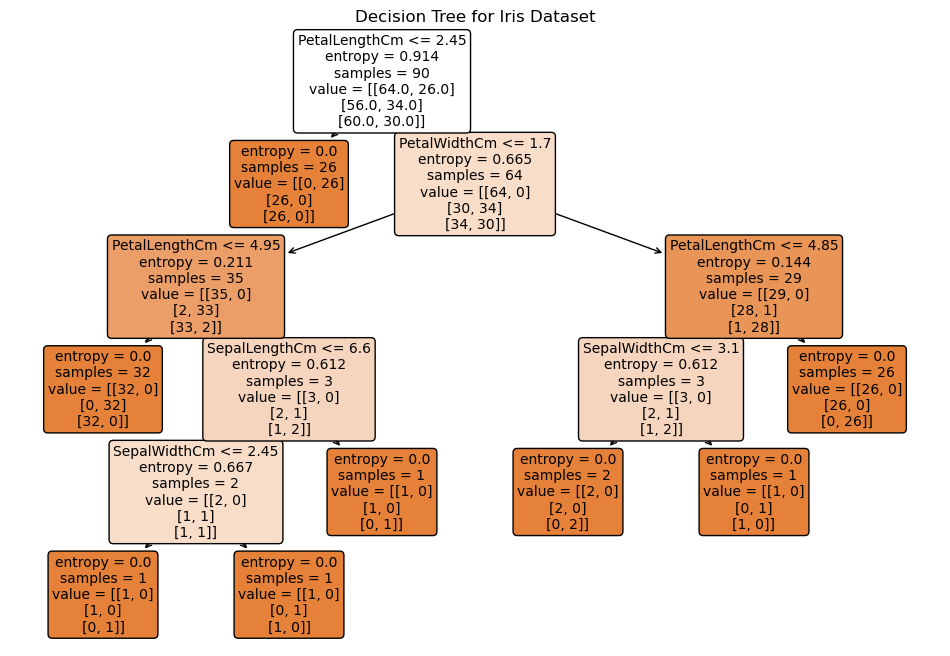

In [52]:
# 1.b
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(
    classifier,
    feature_names=features,
    class_names=targets,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Dataset")
plt.show()

In [59]:
# Changin the train - test - split % => 80:20
X2_train , X2_test , Y2_train , Y2_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=60
)

In [60]:
classifier2 = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
# Training the model:
classifier.fit(X2_train, Y2_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
# Predicting on test data
Y2_predicted = classifier.predict(X2_test)

In [62]:
# 1.c

# Evaluate accuracy
accuracy = accuracy_score(Y2_test , Y2_predicted)
print(f"Accuracy: {accuracy}")

# Detailed classification report
class_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(Y2_test, Y2_predicted, target_names=class_names))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.90      0.95        10
   virginica       0.88      1.00      0.93         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



In [63]:
# Changin the train - test - split % => 80:20
X3_train , X3_test , Y3_train , Y3_test = train_test_split(
    X, Y, train_size=0.4, test_size=0.6, random_state=60
)

In [64]:
classifier3 = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
# Training the model:
classifier.fit(X3_train, Y3_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [65]:
# Predicting on test data
Y3_predicted = classifier.predict(X3_test)

In [66]:
# 1.c

# Evaluate accuracy
accuracy = accuracy_score(Y3_test , Y3_predicted)
print(f"Accuracy: {accuracy}")

# Detailed classification report
class_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(Y3_test, Y3_predicted, target_names=class_names))

Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.95      0.84      0.89        25
   virginica       0.88      0.97      0.92        31

   micro avg       0.94      0.94      0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90
 samples avg       0.94      0.94      0.94        90

